Summary of Churn Prediction Model Development.
Preparing data, validation framework, feature importance.
Insights on customer churn and variables.
Measuring variable importance, encoding, and classification.
Logistic regression explained with interpretation tips.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
len(df)

7043

In [5]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [8]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [9]:
df.churn = (df.churn == 'yes').astype(int)

In [10]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [11]:
### 3.3 Setting up the validation framework
from sklearn.model_selection import train_test_split

In [12]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [130]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [14]:
len(df_train_full), len(df_test)

(5634, 1409)

In [15]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)

In [16]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [17]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [18]:
df_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,1448-cywkc,female,0,yes,yes,58,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),105.20,6225.40,0
1,6127-isgtu,female,0,yes,no,16,yes,yes,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,84.95,1378.25,1
2,3279-dyzqm,male,0,yes,yes,71,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.45,1378.45,0
3,8485-gjcdn,female,1,no,no,5,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,mailed_check,69.05,318.50,1
4,2195-zrvax,female,0,yes,no,47,yes,no,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,85.30,4045.65,1


In [19]:
y_train = df_train.churn.values
y_val = df_val.churn.values

In [20]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

In [21]:
### EDA

In [22]:
df_train_full = df_train_full.reset_index(drop=True)

In [23]:
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [24]:
df_train_full.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [25]:
df_train_full.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [26]:
global_mean = df_train_full.churn.mean()
round(global_mean, 3)

np.float64(0.27)

In [27]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [28]:
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [29]:
###3.5 Feature importance: Churn rate and risk ratio
female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()
print('gender == female:', round(female_mean, 3))

male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()
print('gender == male:  ', round(male_mean, 3))

gender == female: 0.277
gender == male:   0.263


###Feature Importance
1) Difference (Global churn - group) > 0 - less likely to churn
   Difference (Global churn - group) < 0 - more likely to churn
2) Risk Ratio > 1
risk = group churn rate/global churn rate > 1 - more likely to churn
risk = group churn rate/global churn rate < 1 - less likely to churn

In [30]:
female_mean / global_mean

np.float64(1.0253955354648652)

In [31]:
male_mean / global_mean

np.float64(0.9749802969838747)

In [32]:
partner_yes = df_train_full[df_train_full.partner == 'yes'].churn.mean()
print('partner == yes:', round(partner_yes, 3))

partner_no = df_train_full[df_train_full.partner == 'no'].churn.mean()
print('partner == no :', round(partner_no, 3))

partner == yes: 0.205
partner == no : 0.33


In [33]:
partner_yes / global_mean

np.float64(0.7594724924338315)

In [34]:
partner_no / global_mean

np.float64(1.2216593879412643)

In [35]:
df_group = df_train_full.groupby(by='gender').churn.agg(['mean'])
df_group['diff'] = df_group['mean'] - global_mean
df_group['risk'] = df_group['mean'] / global_mean
df_group

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


In [36]:
from IPython.display import display

In [37]:
for col in categorical:
    df_group = df_train_full.groupby(by=col).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


In [38]:
###3.6 Feature importance - Categorical variables

In [39]:
from sklearn.metrics import mutual_info_score

In [40]:
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.churn)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


display(df_mi.head())
display(df_mi.tail())

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923


,MI
partner,0.009968
seniorcitizen,0.009410
multiplelines,0.000857
phoneservice,0.000229
gender,0.000117


In [41]:
###3.7 Feature importance - Numerical

In [42]:
df_train_full[numerical].corrwith(df_train_full.churn).to_frame('correlation')

,correlation
tenure,-0.351885
monthlycharges,0.196805
totalcharges,-0.196353


In [43]:
df_train_full.groupby(by='churn')[numerical].mean()

,tenure,monthlycharges,totalcharges
churn,,,
0,37.531972,61.176477,2548.021627
1,18.070348,74.521203,1545.689415


In [44]:
# Correlation coefficient between - 1 and 1
##Negative correlation
# Increase in one variable results in decrease in the other variable - 

##Positive correlation
# Increase in one variable results in low/moderate/strong in the other variable - Positive correlation
# low (0.0 to 0.1 or 0.0 to -0.1)
# Moderate (0.2 - 0.5 or -0.2 to -0.5)
# low (0.6 - 1.0 or -0.6 to -1.0)

In [45]:
# x = -infinity to +infinity
# y = { 0, 1}

In [46]:
df_train_full[df_train_full.tenure <= 2].churn.mean()

np.float64(0.5953420669577875)

In [47]:
df_train_full[(df_train_full.tenure > 2) & (df_train_full.tenure <= 12)].churn.mean()

np.float64(0.3994413407821229)

In [48]:
df_train_full[df_train_full.tenure > 12].churn.mean()

np.float64(0.17634908339788277)

In [49]:
###3.8 One-hot encoding
# Using Scikit-Learn to encode categorical features

In [50]:
# One hot encoding
# F, M
# M, 1Y, 2Y

In [51]:
from sklearn.feature_extraction import DictVectorizer

In [52]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [53]:
train_dict[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'one_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'credit_card_(automatic)',
 'tenure': 58,
 'monthlycharges': 105.2,
 'totalcharges': 6225.4}

In [54]:
dv = DictVectorizer(sparse=False)
#When initializing a DictVectorizer in scikit-learn, 
#setting the sparse parameter to False instructs the vectorizer to return a dense NumPy array as output, 
#rather than a sparse SciPy matrix.


In [55]:
dv

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [56]:
dv.fit(train_dict)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [57]:
# The categorical values are hot encoded to 0 or 1
# The numerical values will remain intact
# dv.fit_transform combines fit and transform

# Feature matrix for train data
X_train = dv.transform(train_dict)


In [58]:
X_train.shape

(4225, 45)

In [59]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [60]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')

In [61]:
# Feature matrix for validation data
X_val = dv.transform(val_dict)

In [62]:
###3.9 Logistic Regression

In [63]:
##Linear regression g(xi) = w0(bias) + WT*xi (weights vector * feature matrix) = -infinity to +infinity
##Logistic regression g(xi) = sigmoid(w0(bias) + WT*xi (weights vector * feature matrix)) = 0 to 1

In [64]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [65]:
z = np.linspace(-7, 7, 51)

In [66]:
z

array([-7.0000000e+00, -6.7200000e+00, -6.4400000e+00, -6.1600000e+00,
       -5.8800000e+00, -5.6000000e+00, -5.3200000e+00, -5.0400000e+00,
       -4.7600000e+00, -4.4800000e+00, -4.2000000e+00, -3.9200000e+00,
       -3.6400000e+00, -3.3600000e+00, -3.0800000e+00, -2.8000000e+00,
       -2.5200000e+00, -2.2400000e+00, -1.9600000e+00, -1.6800000e+00,
       -1.4000000e+00, -1.1200000e+00, -8.4000000e-01, -5.6000000e-01,
       -2.8000000e-01,  8.8817842e-16,  2.8000000e-01,  5.6000000e-01,
        8.4000000e-01,  1.1200000e+00,  1.4000000e+00,  1.6800000e+00,
        1.9600000e+00,  2.2400000e+00,  2.5200000e+00,  2.8000000e+00,
        3.0800000e+00,  3.3600000e+00,  3.6400000e+00,  3.9200000e+00,
        4.2000000e+00,  4.4800000e+00,  4.7600000e+00,  5.0400000e+00,
        5.3200000e+00,  5.6000000e+00,  5.8800000e+00,  6.1600000e+00,
        6.4400000e+00,  6.7200000e+00,  7.0000000e+00])

In [67]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

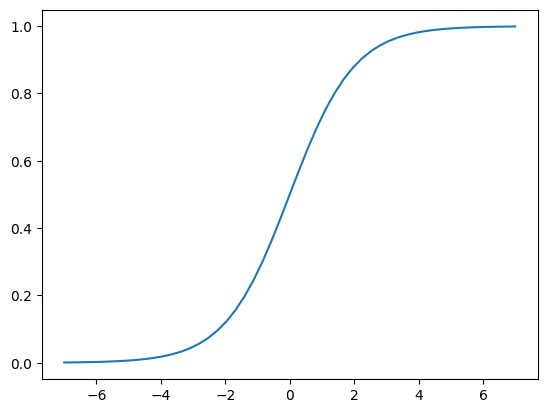

In [68]:
plt.plot(z, sigmoid(z))

In [69]:
# Linear Regression
def linear_regression(xi):
    result = w0

    for j in range(len(w)):
        result = result + w[j] * xi[j]
    return result

In [70]:
# Logistic Regression
def logistic_regression(xi):
    result = w0

    for j in range(len(w)):
        result = result + w[j] * xi[j]
    
    result = sigmoid(result)
    return result

In [71]:
###3.10 Training Logistic Regression with Scikit-Learn

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [74]:
model.coef_

array([[ 5.73417540e-01, -1.66493039e-01, -5.37862231e-01,
        -1.64824012e-02, -1.14455328e-01,  7.60205000e-02,
        -1.13796596e-01, -9.31616333e-02, -2.60004560e-02,
        -1.04937273e-01, -3.52685070e-01,  3.35543936e-01,
        -1.13796596e-01,  1.27734104e-03, -1.70888344e-01,
         1.11628348e-01, -7.16777332e-02,  1.19799407e-01,
        -1.13796596e-01, -1.36940541e-01,  2.62635460e-01,
        -1.13796596e-01, -2.79776593e-01, -2.06672043e-01,
         7.57343135e-02, -1.06698068e-01, -2.42396616e-02,
        -5.55202806e-02, -1.16118369e-01,  2.07577658e-01,
        -1.66876738e-01,  1.11628348e-01, -2.42566077e-01,
         2.50557724e-01, -9.85145315e-02, -1.13796596e-01,
         8.13733982e-02, -9.41886747e-02, -1.13796596e-01,
         7.70475413e-02,  2.03335912e-01, -1.13796596e-01,
        -2.20477046e-01, -6.45383339e-02,  3.86141107e-04]])

In [75]:
#Bias also called as intercept
model.intercept_[0]

np.float64(-0.1309377295167705)

In [76]:
#Weights
model.coef_[0].round(3)

array([ 0.573, -0.166, -0.538, -0.016, -0.114,  0.076, -0.114, -0.093,
       -0.026, -0.105, -0.353,  0.336, -0.114,  0.001, -0.171,  0.112,
       -0.072,  0.12 , -0.114, -0.137,  0.263, -0.114, -0.28 , -0.207,
        0.076, -0.107, -0.024, -0.056, -0.116,  0.208, -0.167,  0.112,
       -0.243,  0.251, -0.099, -0.114,  0.081, -0.094, -0.114,  0.077,
        0.203, -0.114, -0.22 , -0.065,  0.   ])

In [77]:
#Hard predictions as we have the exact labels
model.predict(X_train)

array([0, 1, 0, ..., 0, 0, 0], shape=(4225,))

In [78]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [79]:
#Soft predictions
model.predict_proba(X_val)

array([[0.76799773, 0.23200227],
       [0.75226245, 0.24773755],
       [0.72286754, 0.27713246],
       ...,
       [0.99773199, 0.00226801],
       [0.8774217 , 0.1225783 ],
       [0.99855878, 0.00144122]], shape=(1409, 2))

In [80]:
y_pred = model.predict_proba(X_val)[:, 1]

In [81]:
y_pred

array([0.23200227, 0.24773755, 0.27713246, ..., 0.00226801, 0.1225783 ,
       0.00144122], shape=(1409,))

In [82]:
churn_decision = (y_pred >= 0.5)

In [83]:
df_val[churn_decision].customerid

10      6551-gnydg
16      0689-nkylf
18      3398-fshon
19      4704-eryfc
26      8258-gstjk
           ...    
1387    1965-ddbwu
1388    2694-ciumo
1389    9389-acwbi
1393    8837-vvwlq
1405    4273-mbhya
Name: customerid, Length: 337, dtype: object

In [84]:
y_val

array([0, 1, 0, ..., 0, 0, 0], shape=(1409,))

In [85]:
(y_val == churn_decision).mean()

np.float64(0.7991483321504613)

In [86]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [87]:
df_pred

,probability,prediction,actual
0,0.232002,0,0
1,0.247738,0,1
2,0.277132,0,0
3,0.355825,0,1
4,0.053981,0,0
...,...,...,...
1404,0.028544,0,0
1405,0.786681,1,0
1406,0.002268,0,0
1407,0.122578,0,0


In [88]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [89]:
df_pred

,probability,prediction,actual,correct
0,0.232002,0,0,True
1,0.247738,0,1,False
2,0.277132,0,0,True
3,0.355825,0,1,False
4,0.053981,0,0,True
...,...,...,...,...
1404,0.028544,0,0,True
1405,0.786681,1,0,False
1406,0.002268,0,0,True
1407,0.122578,0,0,True


In [90]:
df_pred.correct.mean()

np.float64(0.7991483321504613)

In [91]:
### 3.11 Model Interpretation
# Look at the coefficients
# Train a smaller model with fewer features

In [92]:
model.coef_[0].round(3)

array([ 0.573, -0.166, -0.538, -0.016, -0.114,  0.076, -0.114, -0.093,
       -0.026, -0.105, -0.353,  0.336, -0.114,  0.001, -0.171,  0.112,
       -0.072,  0.12 , -0.114, -0.137,  0.263, -0.114, -0.28 , -0.207,
        0.076, -0.107, -0.024, -0.056, -0.116,  0.208, -0.167,  0.112,
       -0.243,  0.251, -0.099, -0.114,  0.081, -0.094, -0.114,  0.077,
        0.203, -0.114, -0.22 , -0.065,  0.   ])

In [93]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [94]:
model.intercept_[0]

np.float64(-0.1309377295167705)

In [95]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.573),
 'contract=one_year': np.float64(-0.166),
 'contract=two_year': np.float64(-0.538),
 'dependents=no': np.float64(-0.016),
 'dependents=yes': np.float64(-0.114),
 'deviceprotection=no': np.float64(0.076),
 'deviceprotection=no_internet_service': np.float64(-0.114),
 'deviceprotection=yes': np.float64(-0.093),
 'gender=female': np.float64(-0.026),
 'gender=male': np.float64(-0.105),
 'internetservice=dsl': np.float64(-0.353),
 'internetservice=fiber_optic': np.float64(0.336),
 'internetservice=no': np.float64(-0.114),
 'monthlycharges': np.float64(0.001),
 'multiplelines=no': np.float64(-0.171),
 'multiplelines=no_phone_service': np.float64(0.112),
 'multiplelines=yes': np.float64(-0.072),
 'onlinebackup=no': np.float64(0.12),
 'onlinebackup=no_internet_service': np.float64(-0.114),
 'onlinebackup=yes': np.float64(-0.137),
 'onlinesecurity=no': np.float64(0.263),
 'onlinesecurity=no_internet_service': np.float64(-0.114),
 'onlinesecurity=yes

In [96]:
subset = ['contract', 'tenure', 'totalcharges']

In [97]:
df_train[subset].iloc[:10].to_dict(orient='records')

[{'contract': 'one_year', 'tenure': 58, 'totalcharges': 6225.4},
 {'contract': 'month-to-month', 'tenure': 16, 'totalcharges': 1378.25},
 {'contract': 'two_year', 'tenure': 71, 'totalcharges': 1378.45},
 {'contract': 'month-to-month', 'tenure': 5, 'totalcharges': 318.5},
 {'contract': 'month-to-month', 'tenure': 47, 'totalcharges': 4045.65},
 {'contract': 'one_year', 'tenure': 62, 'totalcharges': 3425.35},
 {'contract': 'one_year', 'tenure': 36, 'totalcharges': 1893.5},
 {'contract': 'one_year', 'tenure': 18, 'totalcharges': 1633.0},
 {'contract': 'one_year', 'tenure': 30, 'totalcharges': 723.3},
 {'contract': 'month-to-month', 'tenure': 40, 'totalcharges': 2036.55}]

In [98]:
dicts_train_small = df_train[subset].to_dict(orient='records')
dicts_val_small = df_val[subset].to_dict(orient='records')

In [99]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [100]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'tenure', 'totalcharges'], dtype=object)

In [101]:
X_train_small = dv_small.transform(dicts_train_small)


In [102]:
model_small = LogisticRegression(solver='liblinear', random_state=1)
model_small.fit(X_train_small, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [103]:
w0 = model_small.intercept_[0]

In [104]:
model_small.coef_[0].round(3)

array([ 9.410e-01, -2.060e-01, -1.418e+00, -9.400e-02,  1.000e-03])

In [105]:
subset = ['contract', 'tenure', 'totalcharges']
train_dict_small = df_train[subset].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_dict_small)

X_small_train = dv_small.transform(train_dict_small)

dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'tenure', 'totalcharges'], dtype=object)

In [106]:
model_small = LogisticRegression(solver='liblinear', random_state=1)
model_small.fit(X_small_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [107]:
model_small.intercept_[0]

np.float64(-0.6824110032388816)

In [108]:
dict(zip(dv_small.get_feature_names_out(), model_small.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.941),
 'contract=one_year': np.float64(-0.206),
 'contract=two_year': np.float64(-1.418),
 'tenure': np.float64(-0.094),
 'totalcharges': np.float64(0.001)}

In [109]:
dicts_val_small = df_val[subset].to_dict(orient='records')
X_val_small = dv_small.transform(dicts_val_small)

In [110]:
y_pred_small = model_small.predict_proba(X_val_small)[:, 1]

In [111]:
y_pred_small

array([0.38510803, 0.24658682, 0.1627979 , ..., 0.00073266, 0.20400003,
       0.00042877], shape=(1409,))

In [112]:
## 3.12 Using the model

In [113]:
dicts_train_full = df_train_full[categorical+numerical].to_dict(orient='records'  )

In [114]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_train_full)

In [115]:
y_full_train = df_train_full.churn.values

In [116]:
model = LogisticRegression()
model.fit(X_full_train,y_full_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [117]:
dicts_test = df_test[categorical+numerical].to_dict(orient='records'  )

In [118]:
X_test = dv.transform(dicts_test)

In [126]:
y_pred = model.predict_proba(X_test)[:,1]

In [127]:
churn_decision = (y_pred >= 0.5)

In [131]:
y_test = df_test.churn.values

In [132]:
(churn_decision == y_test).mean()

np.float64(0.24698367636621718)

In [119]:
model = LogisticRegression()
model.fit(X_full_train,y_full_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [120]:
dicts_train_full[:3]

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'tenur

In [121]:
customer = {
    'customerid': '8879-zkjof',
    'gender': 'female',
    'seniorcitizen': 0,
    'partner': 'no',
    'dependents': 'no',
    'tenure': 41,
    'phoneservice': 'yes',
    'multiplelines': 'no',
    'internetservice': 'dsl',
    'onlinesecurity': 'yes',
    'onlinebackup': 'no',
    'deviceprotection': 'yes',
    'techsupport': 'yes',
    'streamingtv': 'yes',
    'streamingmovies': 'yes',
    'contract': 'one_year',
    'paperlessbilling': 'yes',
    'paymentmethod': 'bank_transfer_(automatic)',
    'monthlycharges': 79.85,
    'totalcharges': 3320.75,
}

In [122]:
X_test = dv.transform([customer])
model.predict_proba(X_test)[0, 1]

np.float64(0.057041834422258124)

In [123]:
print(list(X_test[0]))

[np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(1.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(79.85), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0), np.float64(1.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(0.0), np.float64(1.0), np.float64(41.0), np.float64(3320.75)]


In [124]:
customer = {
    'gender': 'female',
    'seniorcitizen': 1,
    'partner': 'no',
    'dependents': 'no',
    'phoneservice': 'yes',
    'multiplelines': 'yes',
    'internetservice': 'fiber_optic',
    'onlinesecurity': 'no',
    'onlinebackup': 'no',
    'deviceprotection': 'no',
    'techsupport': 'no',
    'streamingtv': 'yes',
    'streamingmovies': 'no',
    'contract': 'month-to-month',
    'paperlessbilling': 'yes',
    'paymentmethod': 'electronic_check',
    'tenure': 1,
    'monthlycharges': 85.7,
    'totalcharges': 85.7
}

In [125]:
X_test = dv.transform([customer])
model.predict_proba(X_test)[0, 1]

np.float64(0.8157124401263212)